## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

## Read & Clean data

In [2]:
def read_and_clean_movie_data(filepath):
    """
    Read and clean movie data from a CSV file.
    
    Parameters:
    filepath (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: Cleaned movie dataset
    """
    # Read the CSV file
    df = pd.read_csv(filepath)
   
    # Clean up the Gross column by removing commas and converting to numeric
    df['Gross'] = df['Gross'].str.replace(',', '').str.replace('"', '').astype(float)
    
    # Clean up Runtime column
    df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)
    
    # Handle missing or infinite values
    numeric_columns = ['IMDB_Rating', 'Runtime', 'Gross']
    
    # Replace infinite values with NaN
    df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)
    
    # Impute missing values with median
    imputer = SimpleImputer(strategy='median')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    
    return df

### Load data

In [11]:
movies_df = read_and_clean_movie_data('imdb_top_1000.csv')
movies_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


## Plot-1: Descriptive Statistics - HeatMap

Descriptive Statistics:
       IMDB_Rating      Runtime         Gross
count  1000.000000  1000.000000  1.000000e+03
mean      7.949300   122.891000  6.051360e+07
std       0.275491    28.093671  1.014192e+08
min       7.600000    45.000000  1.305000e+03
25%       7.700000   103.000000  5.012919e+06
50%       7.900000   119.000000  2.353089e+07
75%       8.100000   137.000000  6.153989e+07
max       9.300000   321.000000  9.366622e+08


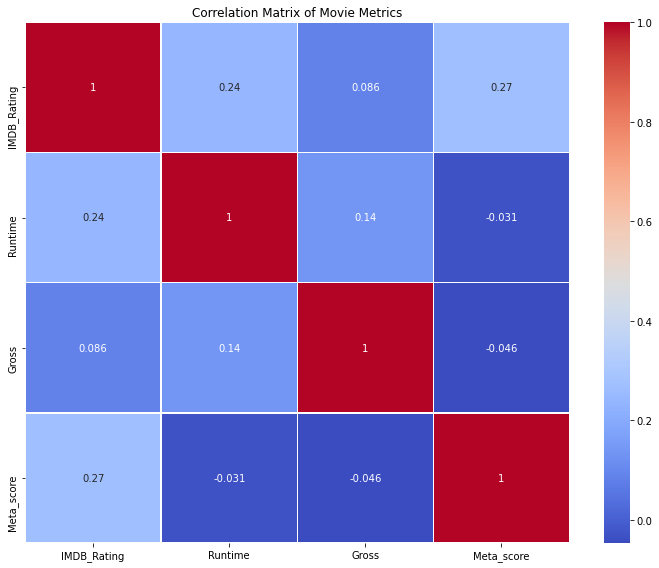

In [4]:
def descriptive_statistics(df):
    """
    Perform and print descriptive statistics.
    
    Parameters:
    df (pandas.DataFrame): Movie dataset
    """
    print("Descriptive Statistics:")
    print(df[['IMDB_Rating', 'Runtime', 'Gross']].describe())
    
    # Correlation Matrix
    correlation_matrix = df[['IMDB_Rating', 'Runtime', 'Gross', 'Meta_score']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Movie Metrics')
    plt.tight_layout()
    plt.show()
descriptive_statistics(movies_df)

## Plot-2: Scatter Plot

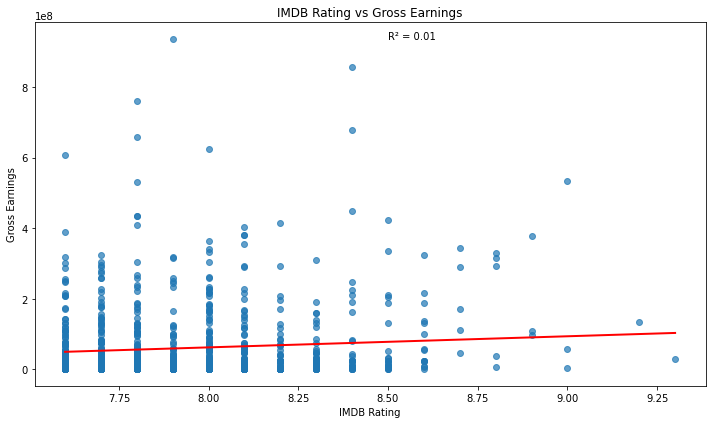

In [5]:
def plot_rating_vs_gross(df):
    """
    Create a scatter plot of IMDB Rating vs Gross with linear regression.
    
    Parameters:
    df (pandas.DataFrame): Movie dataset
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['IMDB_Rating'], df['Gross'], alpha=0.7)
    plt.title('IMDB Rating vs Gross Earnings')
    plt.xlabel('IMDB Rating')
    plt.ylabel('Gross Earnings')
    
    # Prepare data for linear regression
    X = df['IMDB_Rating'].values.reshape(-1, 1)
    y = df['Gross'].values
    
    # Perform linear regression
    reg = LinearRegression().fit(X, y)
    plt.plot(X, reg.predict(X), color='red', linewidth=2)
    plt.text(8.5, df['Gross'].max(), f'R² = {reg.score(X, y):.2f}', fontsize=10)
    
    plt.tight_layout()
    plt.show()
plot_rating_vs_gross(movies_df)

## Plot-3: Bar Chart

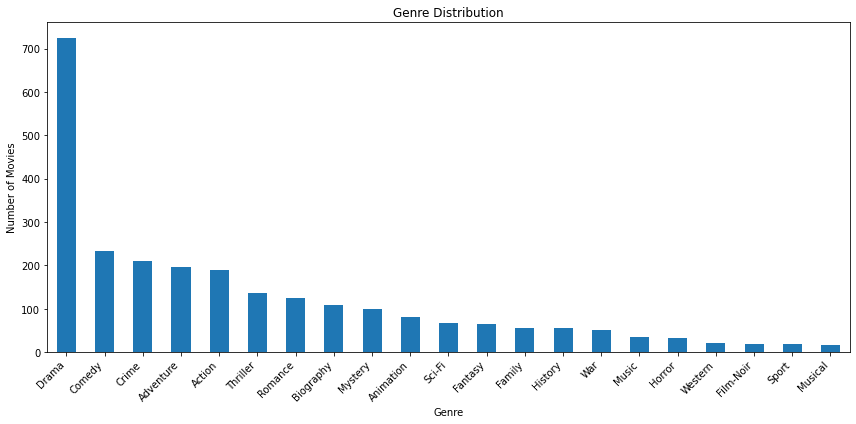

In [6]:
def plot_genre_distribution(df):
    """
    Create a bar plot of genre distribution.
    
    Parameters:
    df (pandas.DataFrame): Movie dataset
    """
    # Explode the Genre column
    df_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
    
    # Count genres
    genre_counts = df_exploded['Genre'].value_counts()
    
    plt.figure(figsize=(12, 6))
    genre_counts.plot(kind='bar')
    plt.title('Genre Distribution')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_genre_distribution(movies_df)

## Plot-4: K-Mean Clustering (Silhouette Plot)

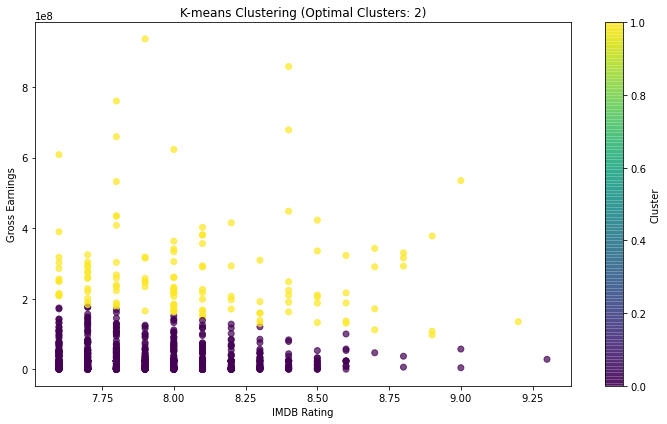

Optimal number of clusters: 2
Silhouette Score: 0.5613


In [7]:
def perform_kmeans_clustering(df):
    """
    Perform K-means clustering on movie data.
    
    Parameters:
    df (pandas.DataFrame): Movie dataset
    """
    # Select features for clustering
    features = ['IMDB_Rating', 'Gross']
    
    # Normalize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(df[features])
    
    # Determine optimal number of clusters using silhouette score
    max_clusters = 5
    silhouette_scores = []
    
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(features_scaled)
        silhouette_scores.append(silhouette_score(features_scaled, cluster_labels))
    
    # Select optimal number of clusters
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    
    # Perform final clustering
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    
    # Visualize clustering
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['IMDB_Rating'], df['Gross'], 
                          c=clusters, 
                          cmap='viridis', 
                          alpha=0.7)
    plt.title(f'K-means Clustering (Optimal Clusters: {optimal_clusters})')
    plt.xlabel('IMDB Rating')
    plt.ylabel('Gross Earnings')
    plt.colorbar(scatter, label='Cluster')
    plt.tight_layout()
    plt.show()
    
    print(f"Optimal number of clusters: {optimal_clusters}")
    print(f"Silhouette Score: {max(silhouette_scores):.4f}")
perform_kmeans_clustering(movies_df)

## Fitting Technique - Line Fitting

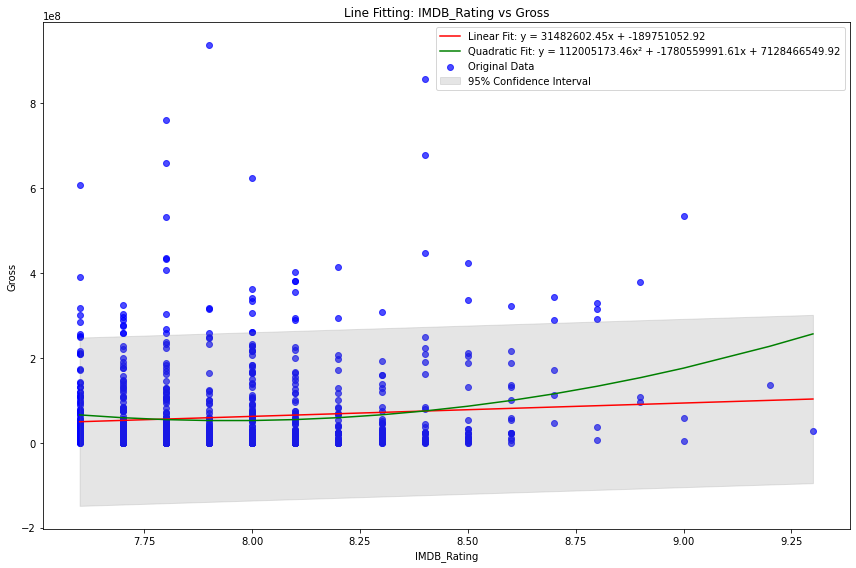


Line Fitting Results:

Linear_Coefficients:
  Slope: 31482602.448984273
  Intercept: -189751052.92371076

Quadratic_Coefficients:
  Quadratic_Term: 112005173.45761262
  Linear_Term: -1780559991.6122978
  Constant_Term: 7128466549.921903

Scipy_Linear_Regression:
  Slope: 31482602.44898438
  Intercept: -189751052.9237115
  R_squared: 0.007313354524413876
  P_value: 0.006812008632138814
  Standard_Error: 11610559.031318542


In [10]:
from scipy import stats
def perform_line_fitting(df, x_column='IMDB_Rating', y_column='Gross'):
    """
    Perform comprehensive line fitting analysis.
    
    Parameters:
    df (pandas.DataFrame): Movie dataset
    x_column (str): Column name for x-axis
    y_column (str): Column name for y-axis
    
    Returns:
    dict: Comprehensive line fitting results
    """
    # Prepare data
    X = df[x_column].values
    y = df[y_column].values
    
    # Numpy Polyfit (1st and 2nd degree polynomials)
    linear_coeffs = np.polyfit(X, y, 1)
    quadratic_coeffs = np.polyfit(X, y, 2)
    
    # Create polynomial functions
    linear_func = np.poly1d(linear_coeffs)
    quadratic_func = np.poly1d(quadratic_coeffs)
    
    # SciPy Linear Regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Scatter plot of original data
    plt.scatter(X, y, color='blue', alpha=0.7, label='Original Data')
    
    # Linear fit line
    plt.plot(X, linear_func(X), color='red', 
             label=f'Linear Fit: y = {linear_coeffs[0]:.2f}x + {linear_coeffs[1]:.2f}')
    
    # Quadratic fit line
    plt.plot(X, quadratic_func(X), color='green', 
             label=f'Quadratic Fit: y = {quadratic_coeffs[0]:.2f}x² + {quadratic_coeffs[1]:.2f}x + {quadratic_coeffs[2]:.2f}')
    
    # Confidence interval
    y_err = y - linear_func(X)
    std_err_pred = np.sqrt(np.sum(y_err**2) / (len(X) - 2))
    
    # Prediction intervals
    n = len(X)
    t_value = stats.t.ppf(0.975, n-2)
    plt.fill_between(X, 
                     linear_func(X) - t_value * std_err_pred, 
                     linear_func(X) + t_value * std_err_pred, 
                     color='gray', 
                     alpha=0.2, 
                     label='95% Confidence Interval')
    
    plt.title(f'Line Fitting: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Prepare and return results
    return {
        'Linear_Coefficients': {
            'Slope': linear_coeffs[0],
            'Intercept': linear_coeffs[1]
        },
        'Quadratic_Coefficients': {
            'Quadratic_Term': quadratic_coeffs[0],
            'Linear_Term': quadratic_coeffs[1],
            'Constant_Term': quadratic_coeffs[2]
        },
        'Scipy_Linear_Regression': {
            'Slope': slope,
            'Intercept': intercept,
            'R_squared': r_value**2,
            'P_value': p_value,
            'Standard_Error': std_err
        }
    }
line_fitting_results = perform_line_fitting(movies_df)
# Print line fitting results
print("\nLine Fitting Results:")
for key, value in line_fitting_results.items():
    print(f"\n{key}:")
    for subkey, subvalue in value.items():
        print(f"  {subkey}: {subvalue}")
